In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request
import numpy as np

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

In [3]:
import scipy.io

In [4]:
mat = scipy.io.loadmat('NormFLEff.mat')

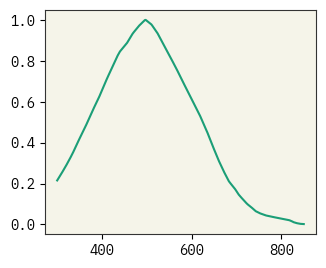

In [5]:
import matplotlib.pyplot as plt

plt.plot(mat['FLEff'][:,0],mat['FLEff'][:,1])

In [12]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the detector PL efficiency curve
# FLEff = np.load('NormFLEff.npy')  # Assuming you saved 'NormFLEff.mat' as a .npy file
FLEff = mat
# Directory listing and file range
files = sorted(os.listdir('/Users/jorgemedina/DOEFinal/DOE/AgML/Data/proposed_trials/BO'))
# inS = 5  # start index of files
# inE = 13  # end index of files
files = [file for file in files if ".txt" in file]

# Gaussian peak selection
GPk = np.ones(len(files))  # Set to 1 for single peak, modify as needed
print(files)

['J1-R1.txt', 'J2-R1.txt', 'J2-R2.txt', 'J2-R3.txt', 'J2-R4.txt', 'J2-R5.txt', 'J3-R1 2 hr.txt', 'J3-R2 2 hr.txt', 'J3-R3.txt', 'J4-R1.txt', 'J4-R2.txt', 'J4-R4.txt', 'J4-R5.txt', 'J4-R6.txt', 'J5-R1C.txt', 'J5-R2C.txt', 'J5-R4C.txt', 'J5-R5C.txt', 'M4-R1-1C.txt', 'M4-R2-2C.txt', 'M4-R3-1C.txt', 'M4-R3-2C.txt', 'M4-R5-2C.txt']


In [15]:
FLEff = FLEff['FLEff']

In [16]:
print(len(FLEff[:,0]),tmp[0,0],tmp[-1,0])
print(np.where(FLEff[:, 0] == tmp[0, 0]))
print(np.where(FLEff[:, 0] == tmp[-1, 0]))

551 441.0 800.0
(array([141]),)
(array([500]),)


['M2-R2.txt', 'M2-R3.txt', 'M2-R4.txt', 'M2-R5.txt', 'M3-R2.txt', 'M3-R3.txt', 'M3-R5.txt', 'R1- NPL B5CL 42OD 30x 5% 0-5mL 0C 60m 0-006M.txt', 'R2- NPL 18 12OD 30x 0-25% 0-5mL 25C 60m 0-006M.txt', 'R3- NPL 18 12OD 30x 0-25% 0-5mL 0C 180m 0-006M.txt', 'R4- NPL 18 12OD 30x 2-5% 0-5mL 25C 60m 0-00668M.txt', 'R5- NPL 18 17-5OD 30x 1-25% 0-25mL 25C 60m 0-00668M.txt']
117.94285714285714
800.0
360
360
0 359


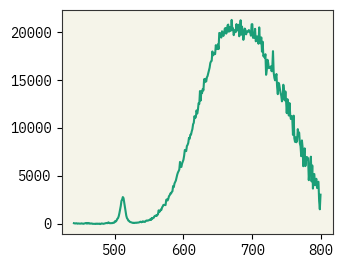

259.54285714285714
800.0
360
360
0 359


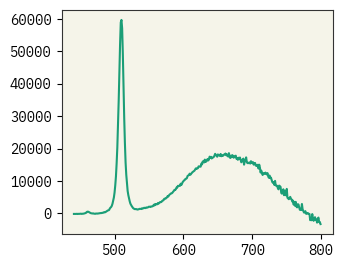

117.88571428571429
800.0
360
360
0 359


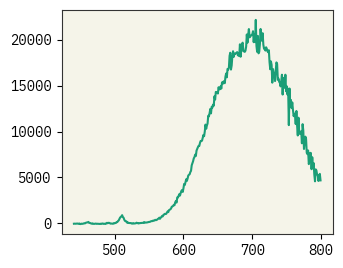

138.57142857142858
800.0
360
360
0 359


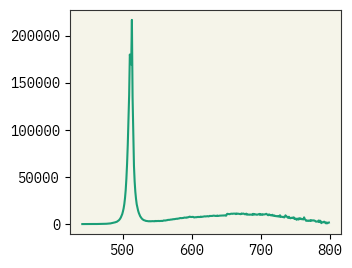

455.57142857142856
800.0
360
360
0 359


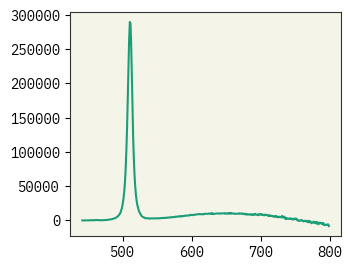

1270.1142857142856
800.0
360
360
0 359


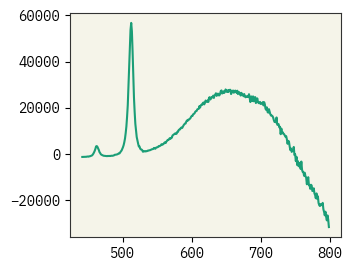

383.74285714285713
800.0
360
360
0 359


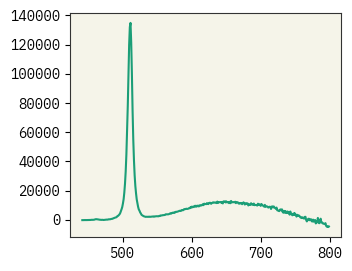

156.65714285714284
800.0
360
360
0 359


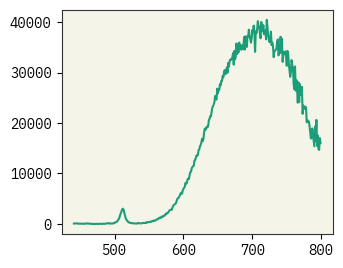

486.34285714285716
800.0
360
360
0 359


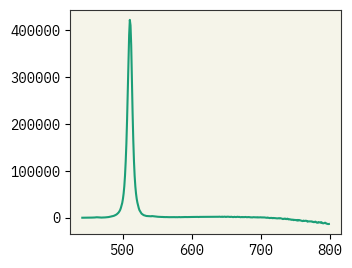

406.51428571428573
800.0
360
360
0 359


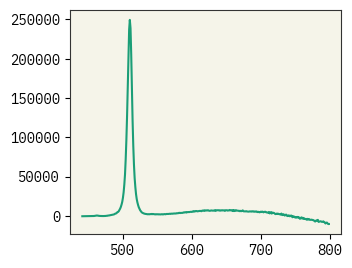

172.4
800.0
360
360
0 359


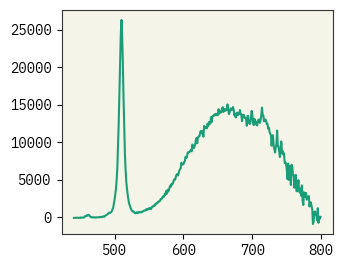

370.0285714285714
800.0
360
360
0 359


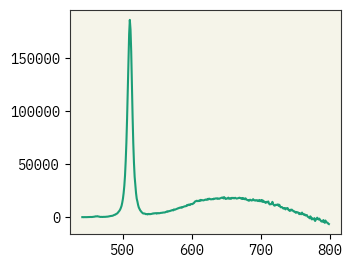

In [84]:
import time
import numpy
# Start timing
start_time = time.time()
dirs= ["/Users/jorgemedina/DOEFinal/DOE/AgML/Data/proposed_trials/NLP2"]

# Loop over each file
for directory in dirs:
    # Get the list of files
    files = sorted(os.listdir(directory))
    files = [file for file in files if ".txt" in file]
    print(files)
    GPk = np.ones(len(files))  # Set to 1 for single peak, modify as needed
    for ind in range(len(files)):
        # Clear variables
        EffS = EffE = Eff = S = None
        
        # Read the data
        # path = '/Users/jorgemedina/DOEFinal/DOE/AgML/Data/proposed_trials/BO/'
        path = directory + '/'
        tmp = pd.read_csv(path+files[ind], sep='\t').to_numpy()  # Adjust delimiter if needed
        WLS = tmp[:, 0]  # Wavelength data
        bkg = np.mean(tmp[:35, 1])  # Background calculation
        print(bkg)
        S = tmp[:, 1] - bkg  # Subtract background from signal
        # Apply efficiency curve
        print(tmp[-1,0])
        EffS = np.where(FLEff[:, 0] == tmp[0, 0])[0][0]  # Start of Eff curve
        EffE = np.where(FLEff[:, 0] == tmp[-1, 0])[0][0]  # End of Eff curve
        Eff = FLEff[EffS:EffE+1, 1]
        WLEff = FLEff[EffS:EffE+1, 0]  # Corrected wavelength array
        print(len(S))
        print(len(Eff))
        tmpC = S / Eff  # Apply efficiency correction
        # Fit range selection
        fitS = 441  # Start of fit range
        fitE = 800  # End of fit range
        i1 = np.where(WLS == fitS)[0][0]
        i2 = np.where(WLS == fitE)[0][0]
        print(i1,i2)
        tmpCF = tmpC[i1:i2]
        tmpWLF = WLS[i1:i2]
    
        # Gaussian fitting function
        def gauss1(x, a,b,c):
            return a/((2 * np.pi *c )**0.5) * np.exp(-((x - b) ** 2) / (2 * c ))
    
        def gauss2(x, a1, b1, c1, a2, b2, c2):
            return (a1 * np.exp(-((x - b1) ** 2) / (2 * c1 ** 2)) +
                    a2 * np.exp(-((x - b2) ** 2) / (2 * c2 ** 2)))
    
        # Perform the Gaussian fit
        plt.plot(tmpWLF, tmpCF, label='To Fit Range')
        plt.show()
        flag = 0
        if GPk[ind] != 1:
            print('here')
            popt, _ = curve_fit(gauss1, tmpWLF, tmpCF, p0=[10000,680,3000])
            yFit = gauss1(np.arange(fitS, 1001), *popt)
        else:
            popt, _ = curve_fit(gauss2, tmpWLF, tmpCF,p0=[10000,511,1.5,100000,680,100])
            if popt[3] < 0:
                print('here at index:', ind)
                popt, _ = curve_fit(gauss1, tmpWLF, tmpCF, p0=[10000,511,1.5])
                flag = 1
        if flag == 1:
            yFit = gauss1(np.arange(fitS, 1001), *popt)
        else:
            yFit = gauss2(np.arange(fitS, 1001), *popt)
        # print(popt)
        # Plot corrected data and fit
        if flag == 1:
            plt.figure(1)
            plt.clf()
            plt.plot(WLS, tmpC, label='Corrected')
            plt.plot(tmpWLF, tmpCF, label='Fit Range')
            plt.plot(np.arange(fitS, 1001), yFit, label='Gaussian Fit')
            plt.legend()
            plt.show()

        # Combine the corrected spectra
        WLFinal = np.arange(WLS[0], 1001)
        SFinal = tmpC
        #save the two columns WLC and yFit to a file
        name = files[ind].split('.')[:-1]
        name = '.'.join(name)
        np.savetxt(path+name+'_corrected.txt', np.column_stack((WLFinal, yFit)), delimiter='\t')
        #save the data to a file with the suffix _corrected
        if flag == 1:
            np.save(path+files[ind].split('.')[0]+'_corrected', SFinal[i1:len(WLFinal)])
            flag = 0
        # SFinal[i1:len(WLFinal)] = yFit


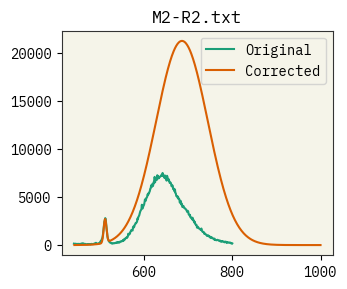

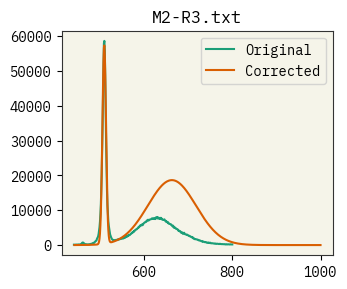

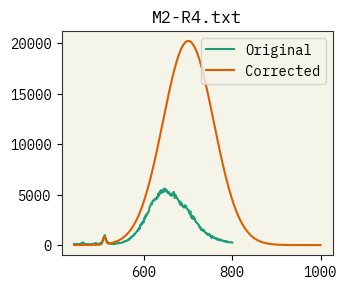

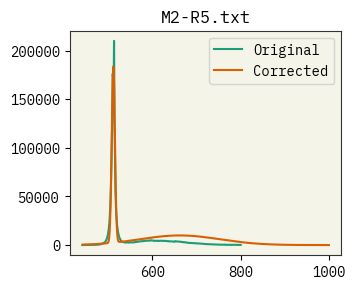

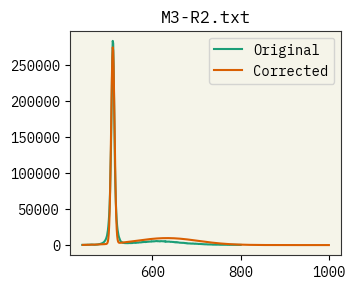

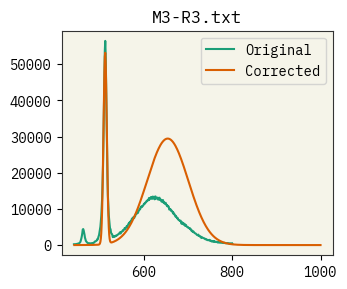

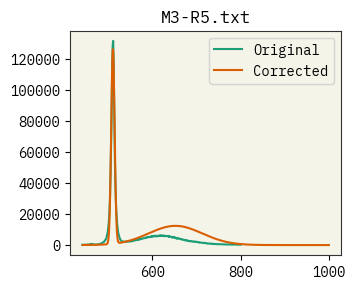

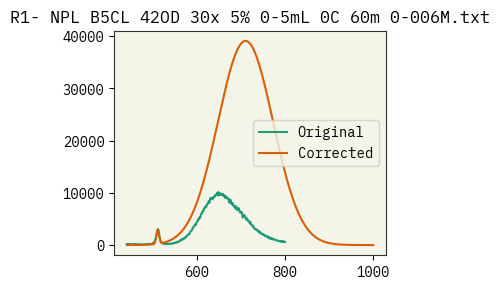

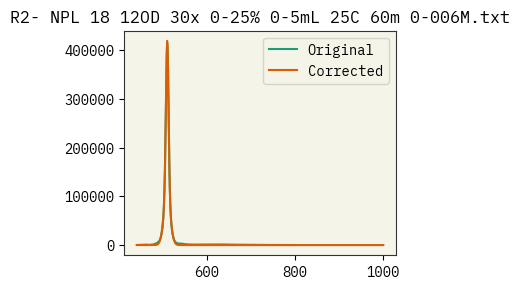

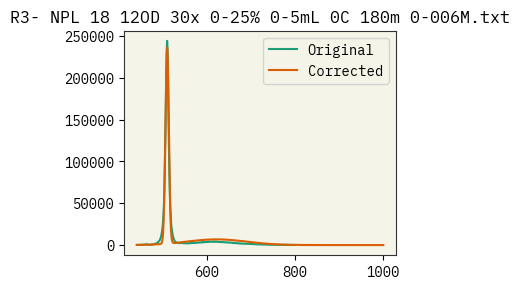

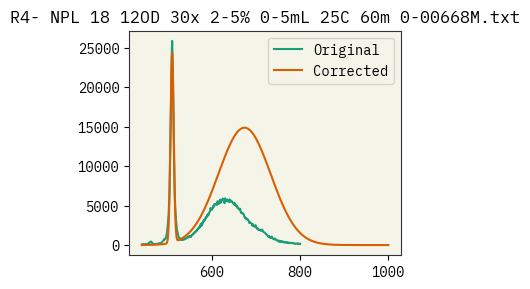

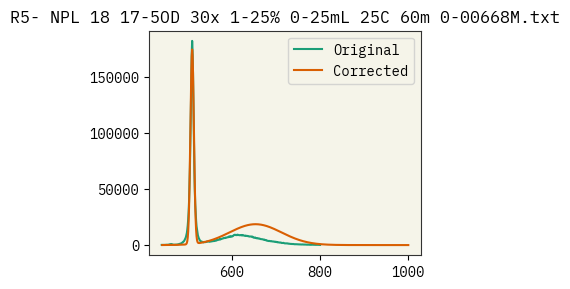

In [92]:
#plot the corrected data and the non correcte data 
directory = '/Users/jorgemedina/DOEFinal/DOE/AgML/Data/proposed_trials/NLP2/'
files = sorted(os.listdir(directory))
files = [file for file in files if ".txt" in file]
files = [file for file in files if "_corrected" not in file]
for file in files:
    tmp = pd.read_csv(path+file, sep='\t').to_numpy()
    try:
        tmpC = pd.read_csv(path+file.split('.')[0]+'_corrected.txt', sep='\t').to_numpy()
    except:
        tmpC = pd.read_csv(path+file, sep='\t').to_numpy()
    plt.plot(tmp[:,0],tmp[:,1],label='Original')
    plt.plot(tmpC[:,0],tmpC[:,1],label='Corrected')
    plt.title(file)
    plt.legend()
    plt.show()
#make the same but for each directory, put them all in the same plot



## Util functions to process Spectre information

In [46]:
import numpy as np 
import pandas as pd
import os
# TODO: Refactor all these functions to take into account that we also have abs spectra now

def _get_peaks(x, y):
    peaks = []
    th = 0.001
    for i in range(1, len(x)-1):
        if y[i] > y[i-1]+th and y[i] > y[i+1]+th:
            peaks.append((x[i], y[i]))
    return peaks

def get_peaks(x, y):
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 800)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return x1[np.argmax(y1)], x2[np.argmax(y2)]

def get_area_under_peaks(x, y, norm=None):
    if not norm:
        return np.trapz(y, x)
    
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 800)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return np.trapz(y1, x1)/norm, np.trapz(y2, x2)/norm

def process_spectrum(x, y, norm_area):
    peaks = get_peaks(x, y)
    areas = get_area_under_peaks(x, y, norm_area)
    return peaks, areas

def smooth_spectrum(x, y, window=4):
    y = np.array(y)
    y_smooth = np.zeros_like(y)
    for i in range(len(y)):
        if i < window:
            y_smooth[i] = np.mean(y[:i+window])
        elif i > len(y) - window:
            y_smooth[i] = np.mean(y[i-window:])
        else:
            y_smooth[i] = np.mean(y[i-window:i+window])
    return x, y_smooth.tolist()

## Get f=AUC2*QY for new data

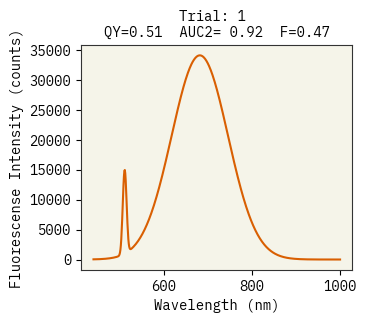

0.094026 absorbance at 430 J1-R1.Sample.Raw.csv
J1-R1_corrected.txt QY: 0.5055166311331106 AUC2: 0.9218210087176167 f: 0.46599585083465545


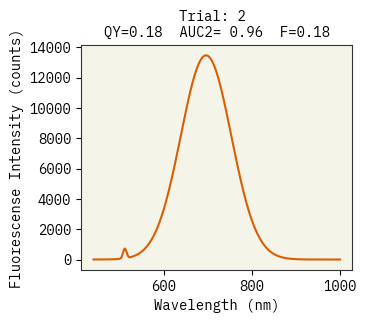

0.089398 absorbance at 430 J2-R1.Sample.Raw.csv
J2-R1_corrected.txt QY: 0.18381679252175942 AUC2: 0.9553797769217633 f: 0.17561484623391257


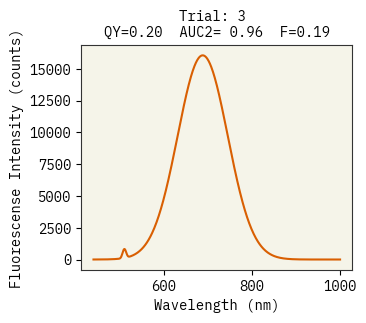

0.098452 absorbance at 430 J2-R2.Sample.Raw.csv
J2-R2_corrected.txt QY: 0.19735577665218035 AUC2: 0.963947961129999 f: 0.1902406985210967


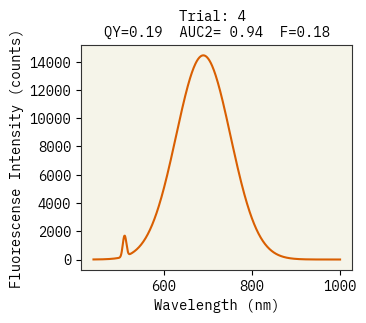

0.098052 absorbance at 430 J2-R3.Sample.Cycle1.Raw.csv
J2-R3_corrected.txt QY: 0.1942533127969996 AUC2: 0.9439031508885753 f: 0.18335631401963193


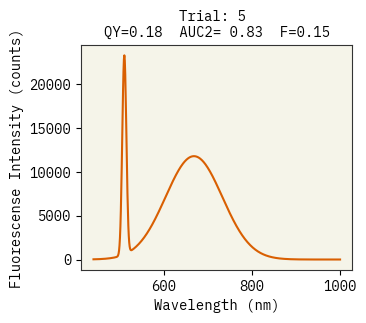

0.104003 absorbance at 430 J2-R4.Sample.Cycle1.Raw.csv
J2-R4_corrected.txt QY: 0.17565034819246353 AUC2: 0.8324548601626438 f: 0.14622098604207692


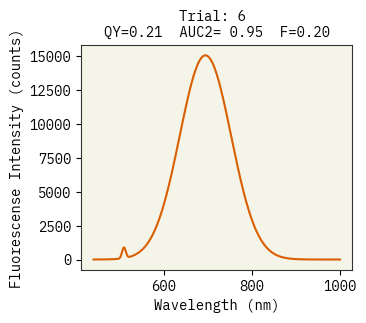

0.089186 absorbance at 430 J2-R5.Sample.Raw.csv
J2-R5_corrected.txt QY: 0.20972907583310735 AUC2: 0.9532460191702413 f: 0.19992340664216324


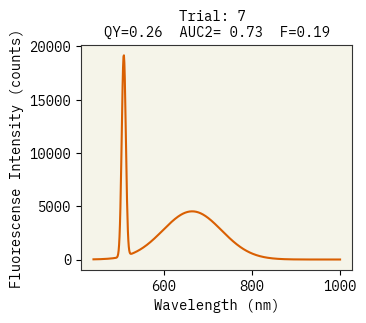

0.031219 absorbance at 430 J3-R1 2hr.Sample.Raw.csv
J3-R1 2 hr_corrected.txt QY: 0.26338177194961393 AUC2: 0.7274299908723542 f: 0.19159179996525214


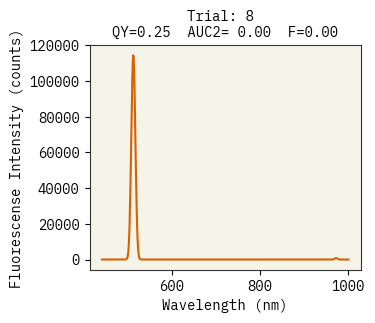

0.043959 absorbance at 430 J3-R2 2hr .Sample.Raw.csv
J3-R2 2 hr_corrected.txt QY: 0.25282758672399236 AUC2: 6.073477342633115e-20 f: 1.5355426195607764e-20


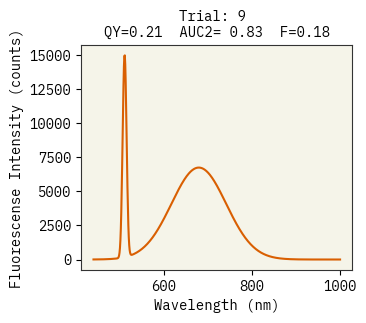

0.04838 absorbance at 430 J3-R3.Sample.Raw.csv
J3-R3_corrected.txt QY: 0.21285843750983438 AUC2: 0.8257221050276224 f: 0.17576191709351108


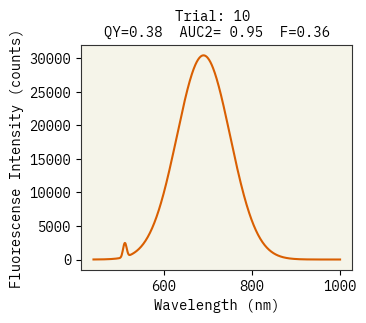

0.10301 absorbance at 430 J4-R1.Sample.Raw.csv
J4-R1_corrected.txt QY: 0.37940414439898335 AUC2: 0.9502081389625536 f: 0.36051290596403796


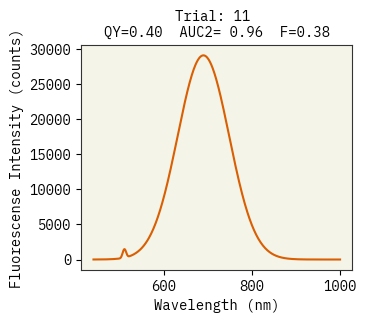

0.09085 absorbance at 430 J4-R2.Sample.Raw.csv
J4-R2_corrected.txt QY: 0.3985725665073514 AUC2: 0.958371475709077 f: 0.3819805787408046


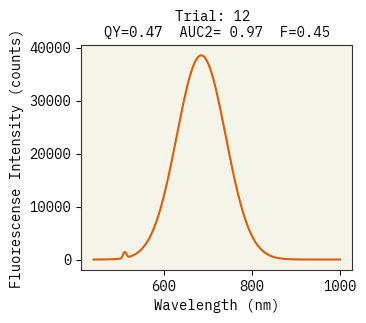

0.097237 absorbance at 430 J4-R4.Sample.Raw.csv
J4-R4_corrected.txt QY: 0.4674080917627999 AUC2: 0.9708057739395961 f: 0.45376247426941474


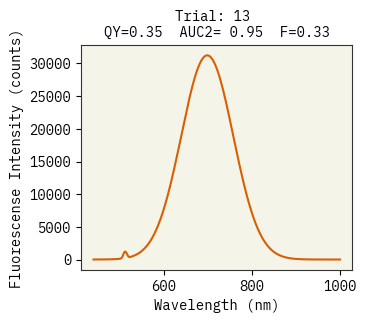

0.113157 absorbance at 430 J4-R5.Sample.Raw.csv
J4-R5_corrected.txt QY: 0.3464518936628415 AUC2: 0.9477139776445712 f: 0.32833730220570556


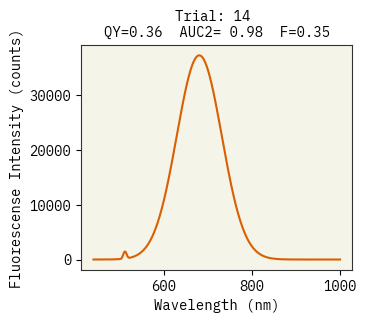

0.113253 absorbance at 430 J4-R6.Sample.Raw.csv
J4-R6_corrected.txt QY: 0.35719819939007785 AUC2: 0.9821361934711423 f: 0.3508172798637172


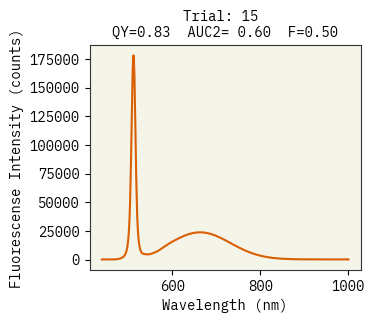

0.063714 absorbance at 430 J5-R1.Sample.Raw.csv
J5-R1_corrected.txt QY: 0.8349991117151625 AUC2: 0.5991796675287101 f: 0.5003144901442593


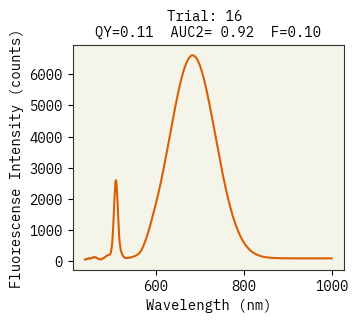

0.071202 absorbance at 430 J5-R2.Sample.Raw.csv
J5-R2_corrected.txt QY: 0.10904257525778764 AUC2: 0.9207063441157948 f: 0.10039619081856907


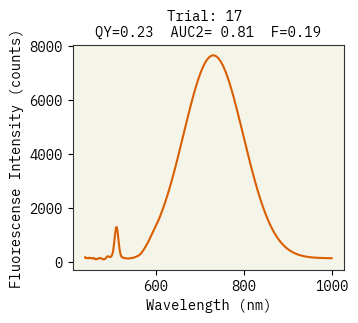

0.050097 absorbance at 430 J5-R4.Sample.Raw.csv
J5-R4_corrected.txt QY: 0.22961785575308374 AUC2: 0.8108579539974632 f: 0.1861874647172301


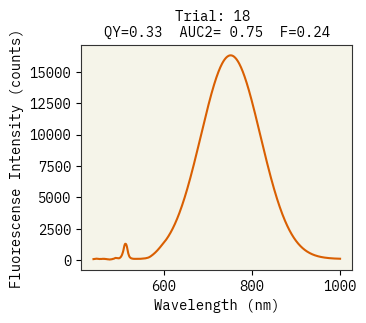

0.072929 absorbance at 430 J5-R5.Sample.Raw.csv
J5-R5_corrected.txt QY: 0.3254652879626269 AUC2: 0.7484779294815789 f: 0.24360358485239283


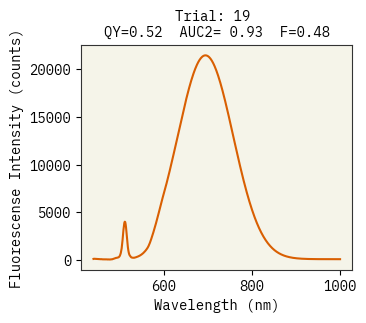

0.055494 absorbance at 430 M4-R1-1.Sample.Raw.csv
M4-R1-1_corrected.txt QY: 0.5197821146175005 AUC2: 0.9280352874559251 f: 0.48237614415350066


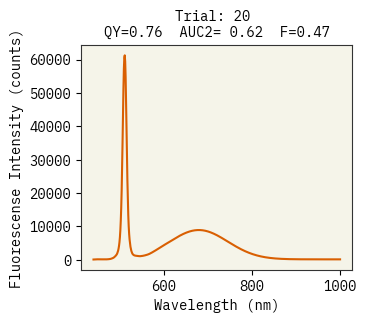

0.024912 absorbance at 430 M4-R2-2.Sample.Raw.csv
M4-R2-2_corrected.txt QY: 0.7630843186566222 AUC2: 0.6151148585398569 f: 0.46938450272445126


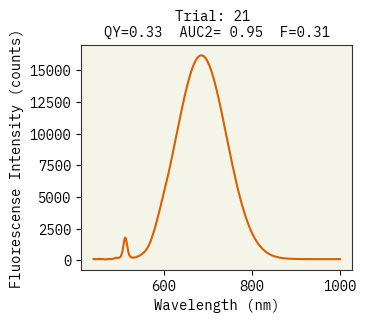

0.05988 absorbance at 430 M4-R3-1.Sample.Raw.csv
M4-R3-1_corrected.txt QY: 0.3301286743440257 AUC2: 0.9531018395370457 f: 0.3146462468012172


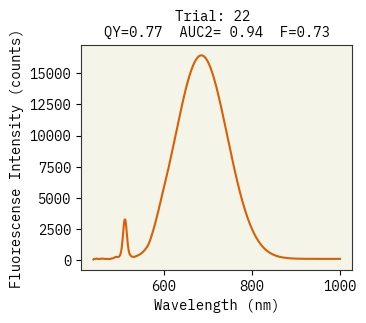

0.026988 absorbance at 430 M4-R3-2.Sample.Raw.csv
M4-R3-2_corrected.txt QY: 0.7700896871250542 AUC2: 0.9445519864707176 f: 0.7273897437345833


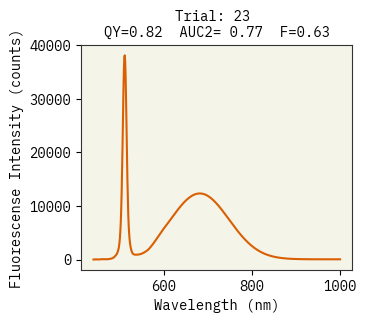

0.025624 absorbance at 430 M4-R5-2.Sample.Raw.csv
M4-R5-2_corrected.txt QY: 0.8240926323228599 AUC2: 0.7653357144062058 f: 0.6307075234957067


In [83]:
#get list of files in Data/fluoressence_data starting in M
import os
import matplotlib.pyplot as plt
files = os.listdir('Data/proposed_trials/BO')
#files = os.listdir('Data/fluorescence_data/proposed_trials/NLP/')
#split files in two lists, one .txt and one .csv
txt_files = [file for file in files if file.endswith('.txt') and 'corrected' in file]
csv_files = [file for file in files if file.endswith('.csv')]
#organize them together such that the first .txt file corresponds to the first .csv file
txt_files.sort() #To make sure they are zipped in the right order correctly
csv_files.sort() #To make sure they are zipped in the right order correctly

for i, (txt, csv) in enumerate(zip(txt_files, csv_files)):
    #with open(f"Data/fluorescence_data/proposed_trials/NLP/{txt}", 'r') as input:
    try:
        with open(f"Data/proposed_trials/BO/{txt}", 'r',encoding='utf-8-sig') as input:
                    lines = input.readlines()
                    x = []
                    y = []
                    for line in lines:
                        x.append(float(line.split()[0]))
                        y.append(float(line.split()[1]))
                    y = [yi-min(y) for yi in y]
                    x, y = smooth_spectrum(x, y)
                    #plot_spectrum(x, y, txt)
                    plt.plot(x, y,color='C1')
                    plt.xlabel('Wavelength (nm)')
                    plt.ylabel('Fluorescense Intensity (counts)')

                    fl_int_norm = [yi/max(y) for yi in y]
                    fl_auc_total = get_area_under_peaks(x, y)
                    peaks, areas = process_spectrum(x, y, norm_area=fl_auc_total)
                    fl_wvl, fl_int = x[:], y[:]
        
        #if os.path.exists(f"Data/fluorescence_data/proposed_trials/NLP/{csv}"):
        if os.path.exists(f"Data/proposed_trials/BO/{csv}"):
                    df = pd.read_csv(f"Data/proposed_trials/BO/{csv}")
                    df.sort_values(by=['nm'], inplace=True) # wavelengths were saved in reversed order
                    x, y = df['nm'].astype(float).to_list(), df[' A'].astype(float).to_list()
                    x, y = smooth_spectrum(x, y)
                    abs_int_norm = [yi/max(y) for yi in y]
                    abs_auc_total = get_area_under_peaks(x, y)
                    abs_wvl, abs_int = x[:], y[:]
                    # qy = qy_r * (fl_s/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2 Constant values took from Farwa's spreadsheet
                    abs_s = df[df['nm'] == 430][' A'].values[0]
                    fl_r, abs_r, n_r = 8272505, 0.129734, 1.3611
                    fl_s, abs_s, n_s = fl_auc_total, abs_s, 1.375
                    qy = 0.53 * (fl_auc_total/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2
                    #two decimals
                    plt.title(f"Trial: {i+1} \nQY={qy:.2f}  AUC2= {areas[1]:.2f}  F={qy*areas[1]:.2f}",fontsize=10)
                    plt.show()
                    print(abs_s,"absorbance at 430",csv)
    except Exception as e:
           print(f"Exception at {txt} and {csv}")
           print(e)
           continue
    print(txt,"QY:",qy,"AUC2:", areas[1],"f:", qy*areas[1])

In [79]:
import os
import matplotlib.pyplot as plt
files = os.listdir('Data/proposed_trials/pre-doping/')
#files = os.listdir('Data/fluorescence_data/proposed_trials/NLP/')
#split files in two lists, one .txt and one .csv
txt_files = [file for file in files if file.endswith('.txt')]
csv_files = [file for file in files if file.endswith('.csv')]
#organize them together such that the first .txt file corresponds to the first .csv file
txt_files.sort() #To make sure they are zipped in the right order correctly
csv_files.sort() #To make sure they are zipped in the right order correctly
for txt,csv in zip(txt_files,csv_files):
    print(txt,csv)

JY-NPL-1 0-115OD 2.txt JY-NPL-1 0.12 .Sample.Raw.csv
NPL-18 0-42OD.txt NPL-18 0.42OD .Sample.Raw.csv
NPL-22 0-42OD.txt NPL-22 0.42OD.Sample.Raw.csv
NPL-23 0-42OD.txt NPL-23 0.42OD.Sample.Raw.csv
NPL-24  0-19OD 2.txt NPL-24  0.18.Sample.Raw.csv
NPL-24 0-42OD 100x 150ms 0-5mm 440-800 430.txt NPL-24 0.42OD.Sample.Raw-2.csv
NPL-24 0-42OD.txt NPL-24 0.42OD.Sample.Raw.csv
NPL-26 0-19OD 2.txt NPL-26 0.19.Sample.Raw.csv
NPL-29 0-332 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt NPL-29 0.332 OD.Sample.Raw.csv
NPL-29 Stock.txt NPL-29-0.42.Sample.Raw.csv
NPL-30  0-40 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt NPL-30  0.40 OD.Sample.Raw.csv
NPL-30 0-212OD.txt NPL-30 0.212.Sample.Raw.csv
NPL-33  0-2552 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt NPL-33  0.2559 OD.Sample.Raw.csv
NPL-33 Stock.txt NPL-33 Stock.Sample.Raw.csv
NPL-34  0-312 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt NPL-34  0.313 OD .Sample.Raw.csv
NPL-34 0-42OD.txt NPL-34 0.30.Sample.Raw.csv
NPL-35 Stock.txt

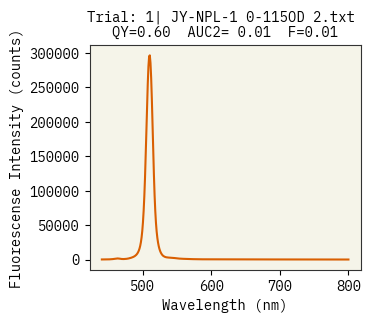

0.057325 absorbance at 430 JY-NPL-1 0.12 .Sample.Raw.csv
JY-NPL-1 0-115OD 2.txt QY: 0.5957364725367669 AUC2: 0.012834030137731897 f: 0.007645699842682956


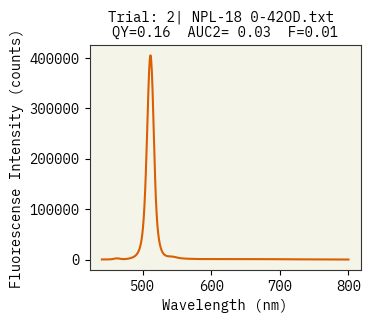

0.306301 absorbance at 430 NPL-18 0.42OD .Sample.Raw.csv
NPL-18 0-42OD.txt QY: 0.1641360151517908 AUC2: 0.03137311427730479 f: 0.005149457960378564


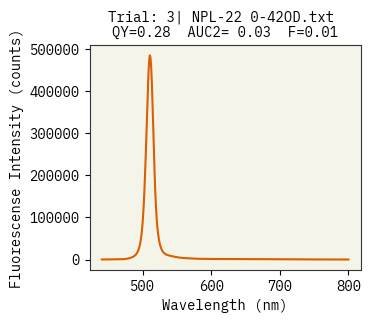

0.22427 absorbance at 430 NPL-22 0.42OD.Sample.Raw.csv
NPL-22 0-42OD.txt QY: 0.2796888294050526 AUC2: 0.03303718057182424 f: 0.009240130360976867


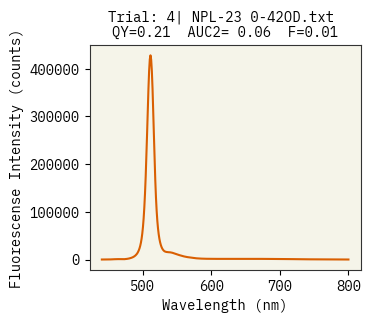

0.264619 absorbance at 430 NPL-23 0.42OD.Sample.Raw.csv
NPL-23 0-42OD.txt QY: 0.2149521833037226 AUC2: 0.056953776137394135 f: 0.012242338528124326


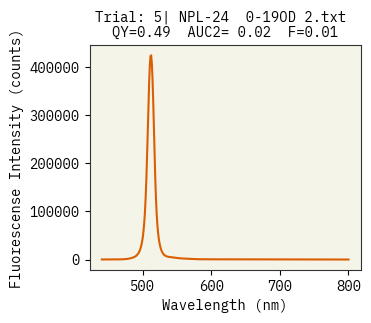

0.099062 absorbance at 430 NPL-24  0.18.Sample.Raw.csv
NPL-24  0-19OD 2.txt QY: 0.49323673048480077 AUC2: 0.017667196232825533 f: 0.008714110106712254


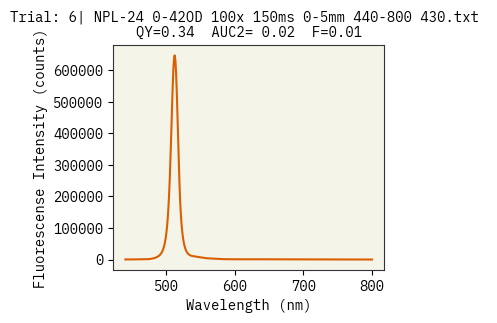

0.237458 absorbance at 430 NPL-24 0.42OD.Sample.Raw-2.csv
NPL-24 0-42OD 100x 150ms 0-5mm 440-800 430.txt QY: 0.33674728355141953 AUC2: 0.02102915959861072 f: 0.00708151237020142


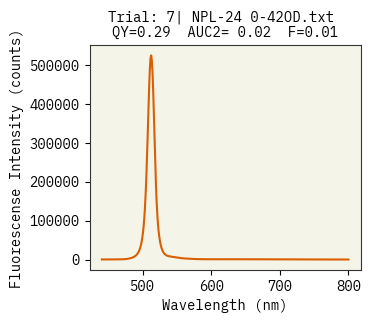

0.223641 absorbance at 430 NPL-24 0.42OD.Sample.Raw.csv
NPL-24 0-42OD.txt QY: 0.2880034732205797 AUC2: 0.02280469859985307 f: 0.006567832402506175


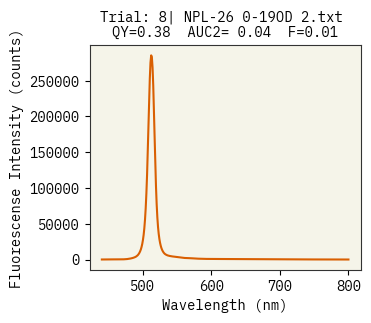

0.088873 absorbance at 430 NPL-26 0.19.Sample.Raw.csv
NPL-26 0-19OD 2.txt QY: 0.377847329588906 AUC2: 0.038487431521523646 f: 0.014542373223143595


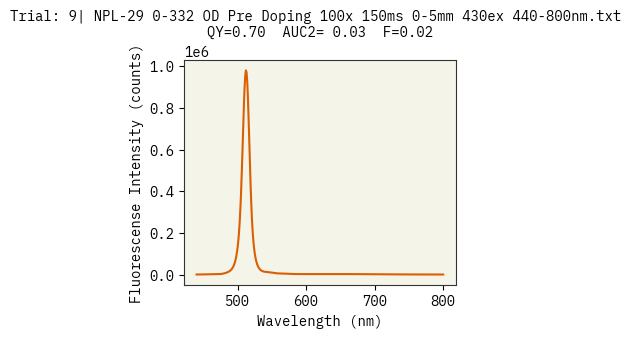

0.178961 absorbance at 430 NPL-29 0.332 OD.Sample.Raw.csv
NPL-29 0-332 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt QY: 0.7033318562305083 AUC2: 0.0311199905431486 f: 0.02188768071458857


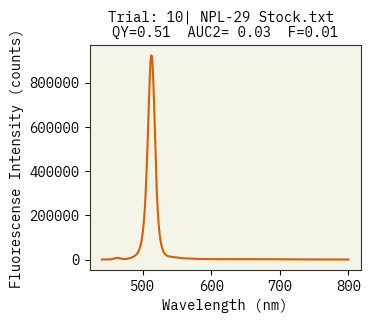

0.235894 absorbance at 430 NPL-29-0.42.Sample.Raw.csv
NPL-29 Stock.txt QY: 0.5122197933087888 AUC2: 0.02810509222571332 f: 0.014395984530779324


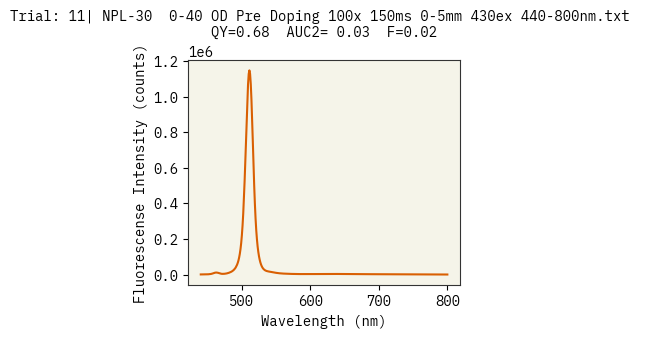

0.225213 absorbance at 430 NPL-30  0.40 OD.Sample.Raw.csv
NPL-30  0-40 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt QY: 0.6842285012499348 AUC2: 0.02810533449596226 f: 0.01923047089930035


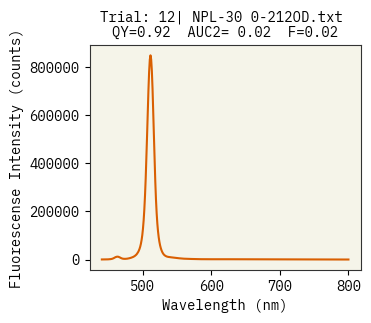

0.112977 absorbance at 430 NPL-30 0.212.Sample.Raw.csv
NPL-30 0-212OD.txt QY: 0.9222865962184378 AUC2: 0.020048607734592744 f: 0.018490562186456186


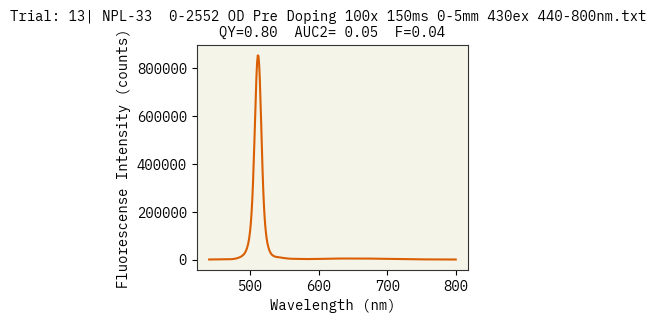

0.135951 absorbance at 430 NPL-33  0.2559 OD.Sample.Raw.csv
NPL-33  0-2552 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt QY: 0.8049994012037336 AUC2: 0.04794820253997438 f: 0.038598274333474715


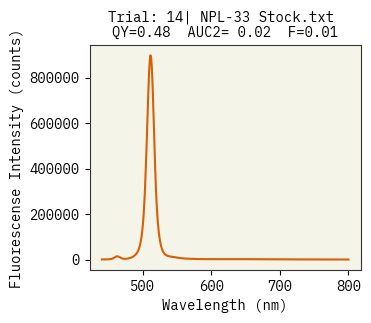

0.248293 absorbance at 430 NPL-33 Stock.Sample.Raw.csv
NPL-33 Stock.txt QY: 0.4773949637593464 AUC2: 0.024561827097007403 f: 0.011725692556839182


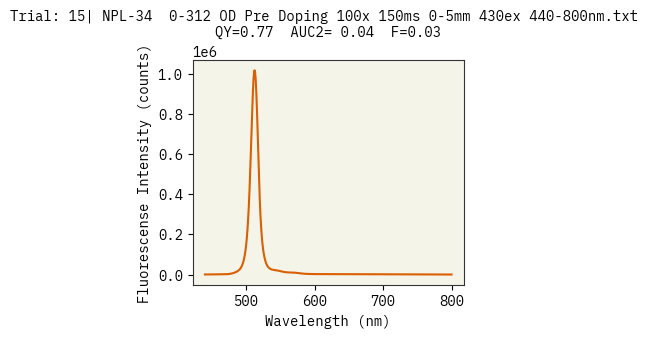

0.177309 absorbance at 430 NPL-34  0.313 OD .Sample.Raw.csv
NPL-34  0-312 OD Pre Doping 100x 150ms 0-5mm 430ex 440-800nm.txt QY: 0.7735331876456709 AUC2: 0.0368113356927491 f: 0.028474789839907075


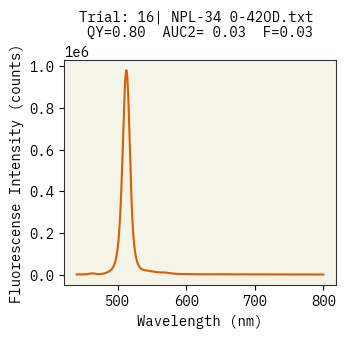

0.163022 absorbance at 430 NPL-34 0.30.Sample.Raw.csv
NPL-34 0-42OD.txt QY: 0.8014953189656024 AUC2: 0.03284913222794057 f: 0.02632842571277648


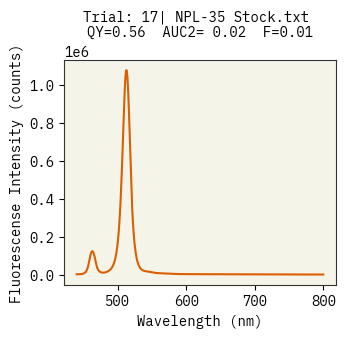

0.286205 absorbance at 430 NPL-35 Stock .Sample.Raw.csv
NPL-35 Stock.txt QY: 0.5616259907937083 AUC2: 0.021962973260665094 f: 0.012334976618296757


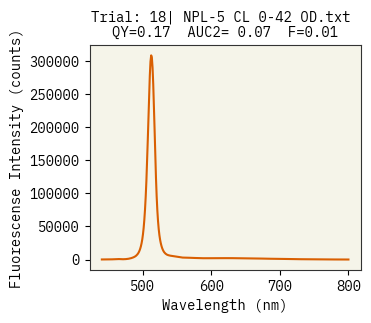

0.232024 absorbance at 430 NPL-5 CL 0.42OD.Sample.Raw.csv
NPL-5 CL 0-42 OD.txt QY: 0.17382864011396407 AUC2: 0.06944414069544723 f: 0.012071380540972383


In [82]:
#get list of files in Data/fluoressence_data starting in M


for i, (txt, csv) in enumerate(zip(txt_files, csv_files)):
    #with open(f"Data/fluorescence_data/proposed_trials/NLP/{txt}", 'r') as input:
    try:
        with open(f"Data/proposed_trials/pre-doping/{txt}", 'r',encoding='utf-8-sig') as input:
                    lines = input.readlines()
                    x = []
                    y = []
                    for line in lines:
                        x.append(float(line.split()[0]))
                        y.append(float(line.split()[1]))
                    y = [yi-min(y) for yi in y]
                    x, y = smooth_spectrum(x, y)
                    #plot_spectrum(x, y, txt)
                    plt.plot(x, y,color='C1')
                    plt.xlabel('Wavelength (nm)')
                    plt.ylabel('Fluorescense Intensity (counts)')

                    fl_int_norm = [yi/max(y) for yi in y]
                    fl_auc_total = get_area_under_peaks(x, y)
                    peaks, areas = process_spectrum(x, y, norm_area=fl_auc_total)
                    fl_wvl, fl_int = x[:], y[:]
        
        #if os.path.exists(f"Data/fluorescence_data/proposed_trials/NLP/{csv}"):
        if os.path.exists(f"Data/proposed_trials/pre-doping/{csv}"):
                    df = pd.read_csv(f"Data/proposed_trials/pre-doping/{csv}")
                    df.sort_values(by=['nm'], inplace=True) # wavelengths were saved in reversed order
                    x, y = df['nm'].astype(float).to_list(), df[' A'].astype(float).to_list()
                    x, y = smooth_spectrum(x, y)
                    abs_int_norm = [yi/max(y) for yi in y]
                    abs_auc_total = get_area_under_peaks(x, y)
                    abs_wvl, abs_int = x[:], y[:]
                    # qy = qy_r * (fl_s/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2 Constant values took from Farwa's spreadsheet
                    abs_s = df[df['nm'] == 430][' A'].values[0]
                    fl_r, abs_r, n_r = 8272505, 0.129734, 1.3611
                    fl_s, abs_s, n_s = fl_auc_total, abs_s, 1.375
                    qy = 0.53 * (fl_auc_total/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2
                    #two decimals
                    plt.title(f"Trial: {i+1}| {txt} \nQY={qy:.2f}  AUC2= {areas[1]:.2f}  F={qy*areas[1]:.2f}",fontsize=10)
                    plt.show()
                    print(abs_s,"absorbance at 430",csv)
    except Exception as e:
           print(f"Exception at {txt} and {csv}")
           print(e)
           continue
    print(txt,"QY:",qy,"AUC2:", areas[1],"f:", qy*areas[1])

In [ ]:
#plot the corrected data and the non correcte data on all dirs
for directory in dirs:
    files = sorted(os.listdir(directory))
    for file in files:
        tmp = pd.read_csv(directory+'/'+file, sep='\t').to_numpy()
        try:
            tmpC = pd.read_csv(directory+'/'+file.split('.')[0]+'_corrected.txt', sep='\t').to_numpy()
        except:
            tmpC = pd.read_csv(directory+'/'+file, sep='\t').to_numpy()
        plt.plot(tmp[:,0],tmp[:,1],label='Original')
        plt.plot(tmpC[:,0],tmpC[:,1],label='Corrected')
        plt.legend()
        plt.show()

## Processing raw data

In [75]:
def f_(d):
    if d.is_integer():
        return f"{int(d)}"
    else:
        decimal = len(str(d).split('.')[1])
        s = f"{d:.{decimal}f}"
        return s
experiments = pd.read_csv('Data/experiments.csv')   # Total of 56 experiments of raw data
                                                    # some data is incomplete, and depending on the purpose of the analysis we might want to discard some of it (e.g.
                                                    # we dont have pre-doping absorbance so we cant calculate predoping QY (pre-QY) for some of the NPLs)
processed_df = pd.DataFrame()
for exp in experiments['Experiment'].unique():
    exp_df = experiments[experiments['Experiment'] == exp]

    for i, setup in exp_df[['Temperature(C)', 'Doping(%)', 'Time(min)']].iterrows():
        T, d, t = setup
        with open(f"Data/fluorescence_data/{exp}/{int(T)}-{f_(d)}-{int(t)}_corrected.txt", 'r') as input:
            lines = input.readlines()
            x = []
            y = []
            for line in lines:
                x.append(float(line.split()[0]))
                y.append(float(line.split()[1]))
            x, y = smooth_spectrum(x, y)
            #substract minimum value to all values
            y = [yi-min(y) for yi in y]
            fl_int_norm = [yi/max(y) for yi in y]
            fl_auc_total = get_area_under_peaks(x, y)
            peaks, areas = process_spectrum(x, y, norm_area=fl_auc_total)
            fl_wvl, fl_int = x[:], y[:]

        if os.path.exists(f"Data/absorbance_data/{exp}/{int(T)}-{f_(d)}-{int(t)}.csv"):
            df = pd.read_csv(f"Data/absorbance_data/{exp}/{int(T)}-{f_(d)}-{int(t)}.csv")
            df.sort_values(by=['nm'], inplace=True) # wavelengths were saved in reversed order
            x, y = df['nm'].astype(float).to_list(), df[' A'].astype(float).to_list()
            x, y = smooth_spectrum(x, y)
            abs_int_norm = [yi/max(y) for yi in y]
            abs_auc_total = get_area_under_peaks(x, y)
            abs_wvl, abs_int = x[:], y[:]
            # qy = qy_r * (fl_s/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2 Constant values took from Farwa's spreadsheet
            abs_s = df[df['nm'] == 430][' A'].values[0]
            fl_r, abs_r, n_r = 8272505, 0.129734, 1.3611
            fl_s, abs_s, n_s = fl_auc_total, abs_s, 1.375
            qy = 0.53 * (fl_auc_total/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2
            qypeak1 = 0.53 * (areas[0]*fl_auc_total/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2
            qypeak2 = 0.53 * (areas[1]*fl_auc_total/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2
        else:
            print(f"File not available: Data/absorbance_data/{exp}/{int(T)}-{f_(d)}-{int(t)}.csv")
            abs_int_norm = None
            abs_auc_total = None
            abs_wvl, abs_int = None, None
            qy = -1
        #if "pre doping" in folder 
        """Some of the NPLs where measured after synthesis/before doping """
        pre_fl_files = ["NPL-4-Predoping 100x dilution 3mL cuvette.txt",
                 "NPL-11 Pre Doping Stock-100x dilution (3mL).txt",
                 "NPL-17 100x Pre Doping.txt",
                 "NPL-17 100x Pre doping stock.txt",
                 "NPL-12 Pre Doping 100x dil.txt",
                 "NPL-13 Pre Doping 100x dil.txt"]
        pre_abs_files = ["NPL-4 100x Pre Doping .csv",
                         "NPL-11 Pre Doping Stock-100x dilution (3mL).csv",
                         "NPL-17 100x Pre Doping.csv",
                         "NPL-17 100x Pre doping stock.csv",
                         "NPL-12 1x Pre doping 100 x.Sample.Raw.csv",
                         "NPL-13 Pre doping 100 x dil .Sample.Raw.csv"]
        #iterate files in directory.
        for file in os.listdir(f"Data/fluorescence_data/{exp}"):
            if file in pre_fl_files:
                print(file)
                with open(f"Data/fluorescence_data/{exp}/{file}", 'r') as input:
                    lines = input.readlines()
                    x = []
                    y = []
                    for line in lines:
                        x.append(float(line.split()[0]))
                        y.append(float(line.split()[1]))
                    x, y = smooth_spectrum(x, y)

                    y = [yi-min(y) for yi in y]                      #substract minimum value to all values (baseline correction)
                    pre_fl_int_norm = [yi/max(y) for yi in y]
                    pre_fl_auc_total = get_area_under_peaks(x, y)
                    pre_peaks, pre_areas = process_spectrum(x, y, norm_area=fl_auc_total)
                    pre_fl_wvl, pre_fl_int = x[:], y[:]
        flag = 0
        for file in os.listdir(f"Data/absorbance_data/{exp}"):
            if file in pre_abs_files:
                flag = 1
                df = pd.read_csv(f"Data/absorbance_data/{exp}/{file}")
                df.sort_values(by=['nm'], inplace=True) # wavelengths were saved in reversed order
                x, y = df['nm'].astype(float).to_list(), df[' A'].astype(float).to_list()
                x, y = smooth_spectrum(x, y)
                abs_int_norm = [yi/max(y) for yi in y]
                abs_auc_total = get_area_under_peaks(x, y)
                abs_wvl, abs_int = x[:], y[:]
                # qy = qy_r * (fl_s/fl_r) * (abs_r/abs_s) * (n_s/n_r)**2 Constant values took from Farwa's spreadsheet
                pre_abs_s = df[df['nm'] == 430][' A'].values[0]
                pre_fl_r, pre_abs_r, n_r = 8272505, 0.129734, 1.3611
                pre_fl_s, pre_abs_s, n_s = pre_fl_auc_total, pre_abs_s, 1.375
                print(pre_fl_auc_total,pre_fl_r,pre_abs_r,pre_abs_s)
                pre_qy = 0.53 * (pre_fl_auc_total/pre_fl_r) * (pre_abs_r/pre_abs_s) * (n_s/n_r)**2
        if flag == 0:
                print(f"File not available: Data/absorbance_data/{exp}")
                abs_int_norm = None
                abs_auc_total = None
                abs_wvl, abs_int = None, None
                pre_qy = -1  #if we dont have pre-doping absorbance we cant calculate pre-doping QY (-1 is the flag to not use the data)
             
        #we add whatever we want to the results_df, we can add other labels here just be sure to calculate them
        #above and any new util function should be added to the top of the file
        results_df = pd.DataFrame({'Temperature(C)': [T], 
                                    'Doping(%)': [d], 
                                    'Time(min)': [t], 
                                    'Peak1': [peaks[0]], 
                                    'Peak2': [peaks[1]], 
                                    'Area1': [areas[0]], 
                                    'Area2': [areas[1]],
                                    'Pre-QY': [pre_qy],
                                    'QY': [qy],
                                    'QY_peak1': [qypeak1],
                                    'QY_peak2': [qypeak2],
                                    # 'Distance_peaks': [peaks[1]-peaks[0]],
                                    # 'ratioP2P1': [areas[1]/areas[0]],
                                    'Fl_Wavelengths': [fl_wvl],
                                    'Fluorescence': [fl_int],
                                    'Fluorescence_norm': [fl_int_norm],
                                    'Abs_Wavelengths': [abs_wvl],
                                    'Absorbance': [abs_int],
                                    'Absorbance_norm': [abs_int_norm]
                                    }) # we can add other labels here
        new_entry = exp_df.merge(results_df, how='inner', on=['Temperature(C)', 'Doping(%)', 'Time(min)'])
        processed_df = pd.concat([processed_df, new_entry], ignore_index=True)
processed_df.to_csv('Data/processed_datawobaselinev7.csv', index=False)

NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-4-Predoping 100x dilution 3mL cuvette.txt
4812581.15 8272505 0.129734 0.100658
NPL-

## Making data for Bayesian Optimization with GPs

[3.07496970e-01 2.30742619e-01 2.34684107e-01 8.38879571e-02
 4.92881452e-08 9.42982443e-02 1.03654015e-01 9.22627459e-02
 9.34143199e-02 1.24480295e-01 1.06450998e-01 1.03100328e-01
 9.54507535e-02 1.28165598e-01 1.21407889e-01 1.67580554e-01
 1.44038875e-01 1.74468493e-01 1.69743032e-01 1.33224468e-01
 1.88305054e-01 1.76120614e-01 3.20538401e-01 3.63978916e-01
 2.91011751e-01 1.86055683e-01 1.80357236e-01 1.12833506e-08
 1.62788692e-01 1.12656084e-08 9.41715779e-02 9.79803656e-02
 8.22179125e-02 2.46886664e-01 5.65085035e-02 2.73843033e-01
 3.08192770e-01 2.48769315e-01 3.66135998e-01 6.00843240e-09
 5.37608234e-23 3.60971019e-23 3.11985015e-02 1.25092534e-23
 2.63425864e-23 3.23517737e-02 1.53250921e-01 6.49503127e-02]
[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 

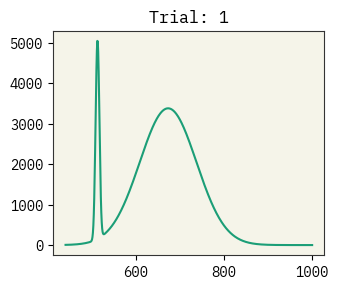

[18.8 14.04 0.175 0.25 1.75 0.006 7.8 5 2 2.5 3.4 60 25 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

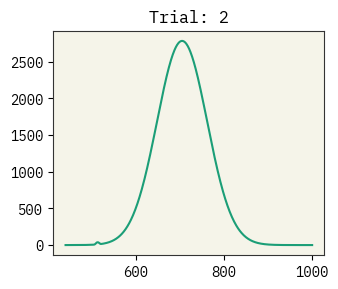

[18.8 14.04 0.175 0.25 1.75 0.006 7.8 5 2 5.0 6.8 60 25 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

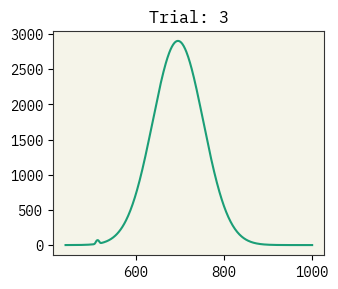

[18.8 14.04 0.175 0.25 1.75 0.006 7.8 5 2 10.0 13.7 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 57

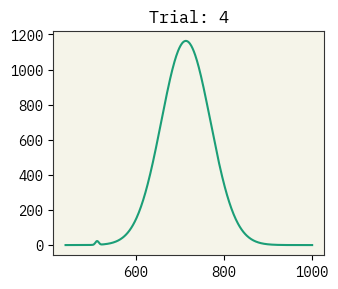

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 0.25 3.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 5

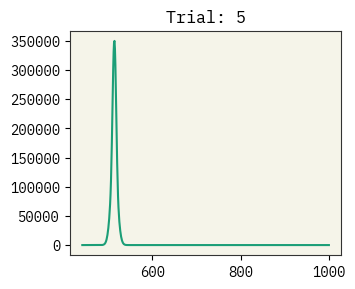

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 0.5 6.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 57

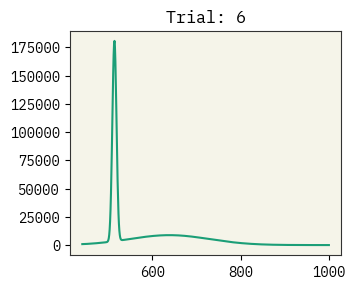

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 0.75 9.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 5

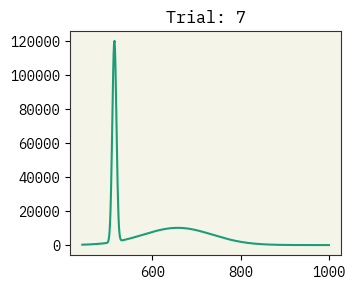

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 1.0 12.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 5

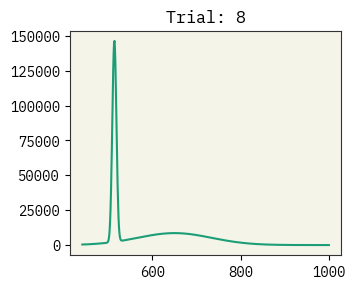

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 1.25 15.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 

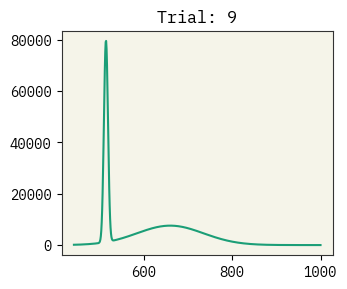

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 1.5 18.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 5

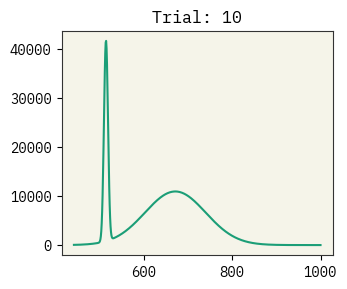

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 1.75 21.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 

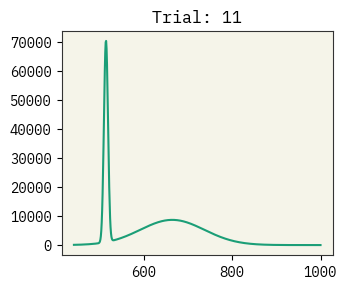

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 2.0 24.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 5

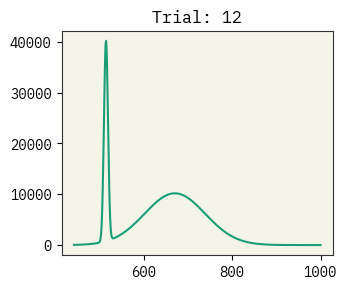

[18.8 14.04 0.175 0.25 1.75 0.0007 3.5 20 8 3.0 36.0 60 25
 0.4055531106737823
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 5

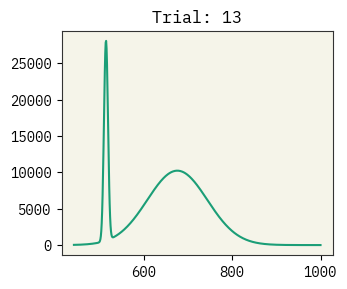

[35.0 15.0 0.212 0.5 3.5 0.0007 3.5 20 8 0.5 23.1 60 25 0.6417238830491356
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

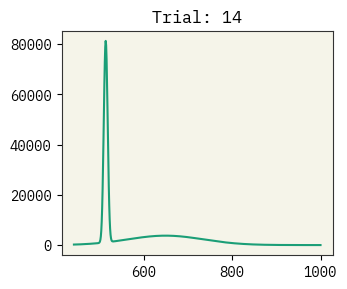

[35.0 15.0 0.212 0.5 3.5 0.0007 3.5 20 8 1.0 46.12 60 25
 0.6417238830491356
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

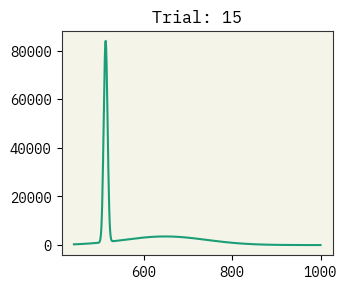

[35.0 15.0 0.212 0.5 3.5 0.0007 3.5 20 8 2.0 92.22 60 25
 0.6417238830491356
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

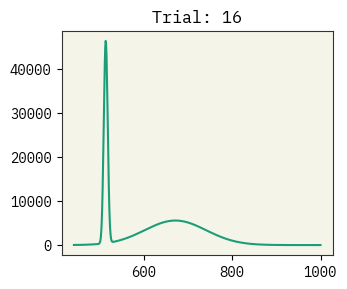

[35.0 15.0 0.212 0.5 3.5 0.0007 3.5 20 8 3.0 138.33 60 25
 0.6417238830491356
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 57

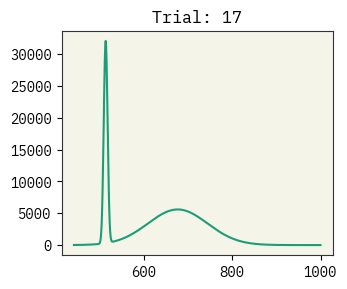

[35.0 15.0 0.212 0.5 3.5 0.0007 3.5 20 8 5.0 230.57 60 25
 0.6417238830491356
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 57

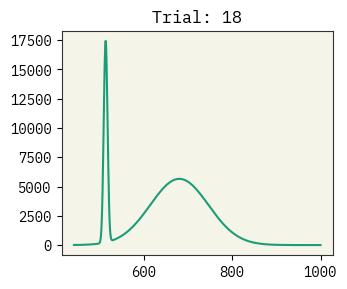

[31.63 13.8 0.12 0.5 3.5 0.0007 3.5 20 8 0.5 12.02 60 25
 0.3876778610238423
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

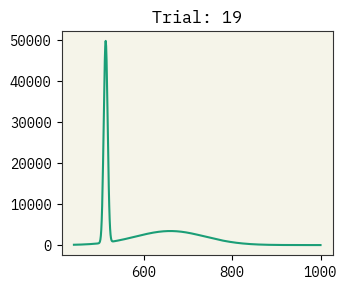

[31.63 13.8 0.12 0.5 3.5 0.0007 3.5 20 8 0.75 19.4 60 25
 0.3876778610238423
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

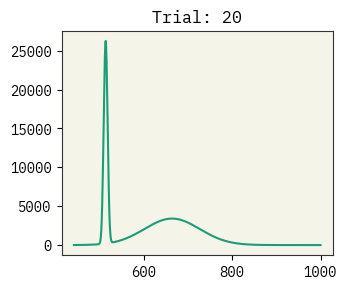

[31.63 13.8 0.12 0.5 3.5 0.0007 3.5 20 8 1.0 25.84 60 25
 0.3876778610238423
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

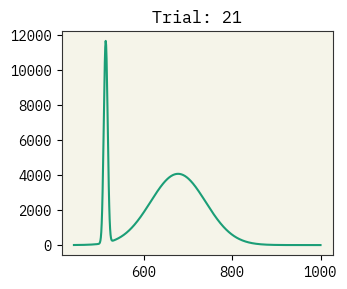

[31.63 13.8 0.12 0.5 3.5 0.0007 3.5 20 8 5.0 129.2 60 25
 0.3876778610238423
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

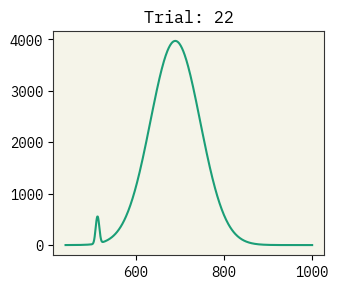

[31.63 13.8 0.12 0.5 3.5 0.006 14.0 10 4 0.25 0.75 60 25
 0.4466916913595101
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

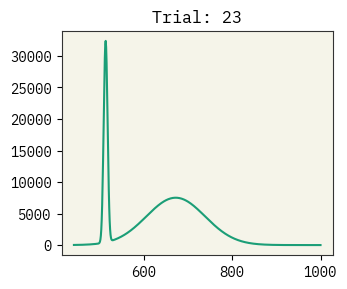

[31.63 13.8 0.12 0.5 3.5 0.006 14.0 10 4 0.5 1.5 60 25 0.4466916913595101
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0,

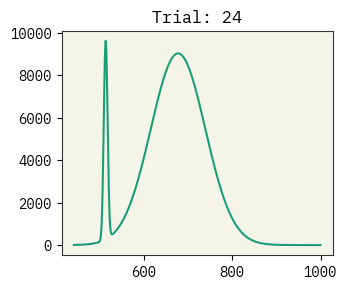

[31.63 13.8 0.12 0.5 3.5 0.006 14.0 10 4 1.0 3.0 60 25 0.4466916913595101
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0,

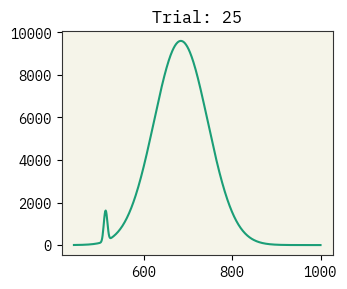

[31.63 13.8 0.12 0.5 3.5 0.006 14.0 10 4 5.0 15.1 60 25 0.4466916913595101
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

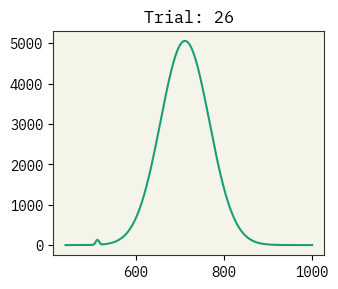

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 10 0 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0,

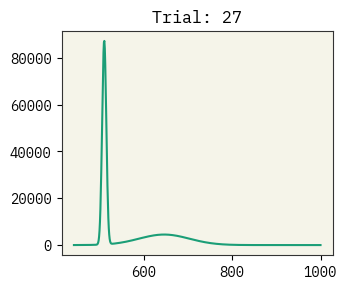

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 10 25 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

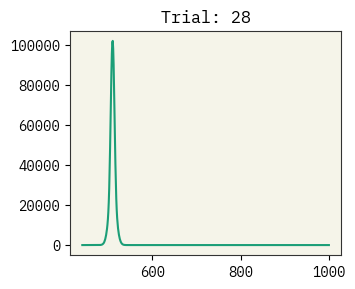

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 10 50 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

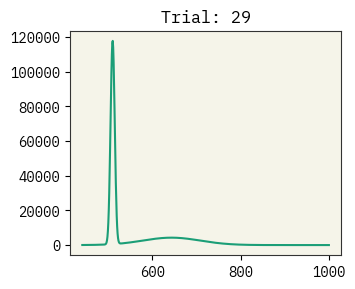

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 60 0 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0,

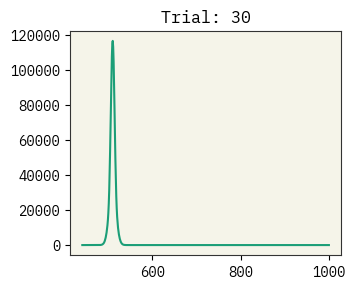

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 60 25 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

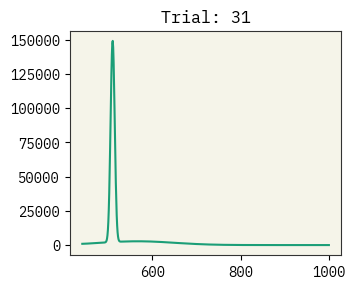

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 60 50 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

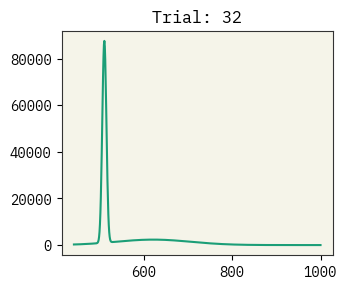

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 3.0 41.9 180 25
 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

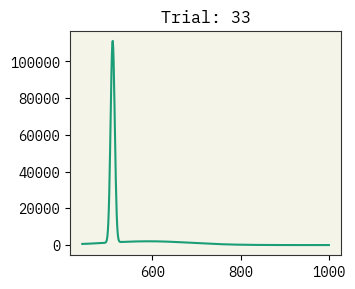

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 10 0 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

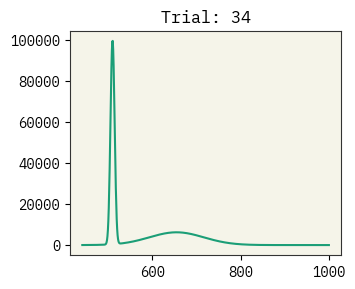

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 10 25
 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

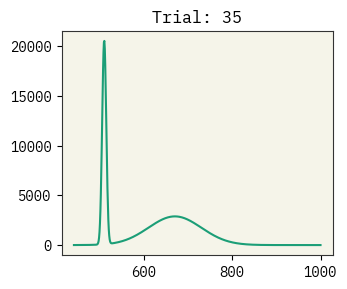

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 10 50
 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

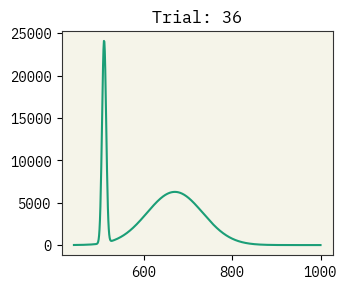

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 60 0 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

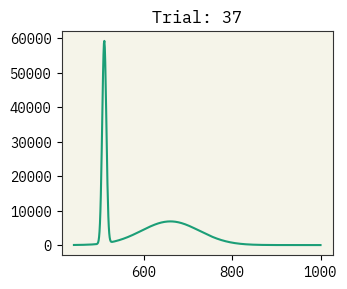

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 60 25
 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

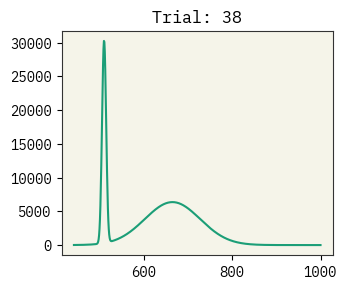

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 60 50
 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

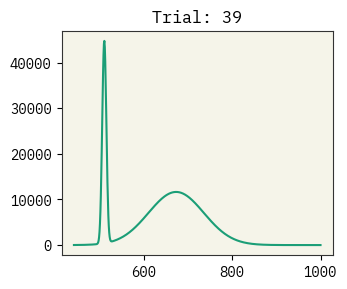

[36.27 6.52 0.12 0.5 3.5 0.0007 3.5 20 8 10.0 97.7 180 25
 0.8266092577025481
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 57

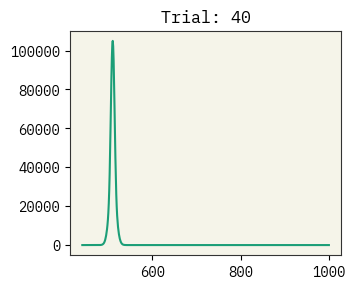

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 1.0 41.1 10 0 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0,

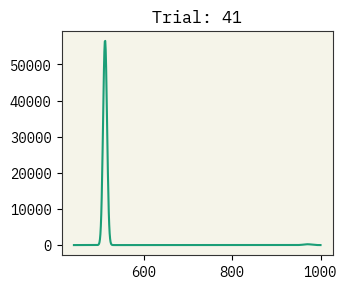

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 1.0 41.1 10 25 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

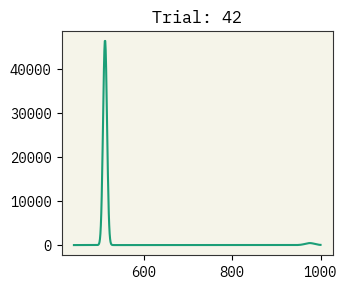

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 1.0 41.1 10 50 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

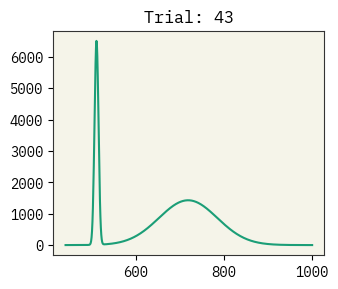

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 1.0 41.1 60 0 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0,

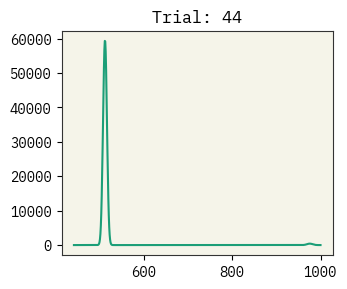

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 1.0 41.1 60 25 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

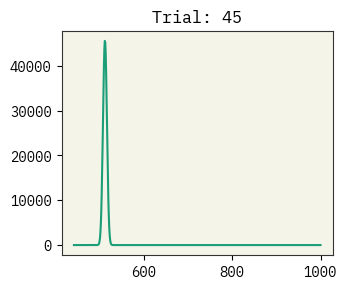

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 1.0 41.1 60 50 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

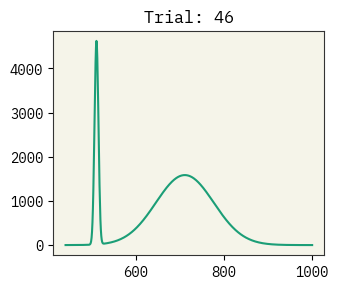

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 5.0 206.0 10 0 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572.0

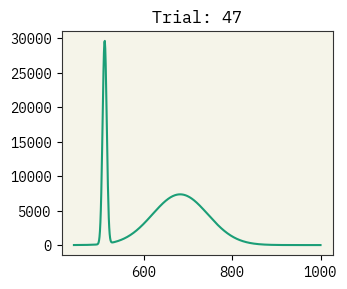

[45.77 7.29 0.26 0.5 3.5 0.0007 3.5 20 8 5.0 206.0 10 25
 0.7719674211362035
 '[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 460.0, 461.0, 462.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 470.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 477.0, 478.0, 479.0, 480.0, 481.0, 482.0, 483.0, 484.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 560.0, 561.0, 562.0, 563.0, 564.0, 565.0, 566.0, 567.0, 568.0, 569.0, 570.0, 571.0, 572

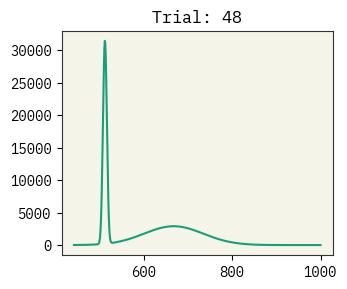

In [77]:
import ast
df = pd.read_csv('Data/processed_datawobaselinev7.csv')


#Maintain only Dimension1(nm),Dimension2(nm),OD,Dilution(%),Nano_stock_vol(mL),Diluted_vol(mL),AgConc(M),AgMass(mg),MeOH_vol(mL),H2O_vol(mL),Doping(%),AgSol(uL),Time(min),Temperature(C),Experiment,
grouped = df.groupby(['Experiment','Doping(%)', 'Time(min)', 'Temperature(C)'])
features_labels_dict = {}

for name, group in grouped:
    features = group[['Dimension1(nm)', 'Dimension2(nm)', 'Dilution(%)', 'Nano_stock_vol(mL)', 
                      'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)', 'MeOH_vol(mL)', 
                      'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)', 
                      'Temperature(C)','Pre-QY','Fl_Wavelengths','Fluorescence']] #we can add more features here or remove some of them

    label = group['Area2']
    label2 = group['QY']

    features_labels_dict[name] = {'features': features, 'label': label, 'labelqy': label2}
group_keys = list(features_labels_dict.keys())

predictions = {}
# Get the group keys for training and testing
train_keys = [group_keys[i] for i in range(len(group_keys)) ]
test_keys = group_keys  # test_keys_index is a list with one elemen
# Prepare the training and testing data
train_features = np.vstack([features_labels_dict[key]['features'] for key in train_keys])
train_labels = np.hstack([features_labels_dict[key]['label'] for key in train_keys])
train_labels2 = np.hstack([features_labels_dict[key]['labelqy'] for key in train_keys])
#remove features whose pre-qy is -1

### add cofe here
pre_qy_not_minus_one_mask = [features_labels_dict[key]['features']['Pre-QY'] != -1 for key in train_keys]
# Apply this mask to train_features, train_labels, and train_labels2
train_features = np.vstack([features_labels_dict[key]['features'][pre_qy_not_minus_one_mask[idx]] for idx, key in enumerate(train_keys)])
train_labels = np.hstack([features_labels_dict[key]['label'][pre_qy_not_minus_one_mask[idx]] for idx, key in enumerate(train_keys)])
train_labels2 = np.hstack([features_labels_dict[key]['labelqy'][pre_qy_not_minus_one_mask[idx]] for idx, key in enumerate(train_keys)])


#remove data with -1 in QY for both qy and area2/ -1 is our flag for missing data
train_labels = train_labels[train_labels2 != -1]  
train_features = train_features[train_labels2 != -1]
train_labels2 = train_labels2[train_labels2 != -1]
if len(train_labels) == len(train_labels2)== len(train_features):
    train_final_label = train_labels * train_labels2
else:
     print("this is not working")

print(train_final_label)
modified_features = train_features.copy()
print(modified_features[:,-2][1])
print(type(modified_features[:,-2][1]))
print(modified_features[:,-1][1])
print(type(modified_features[:,-1][1]))
for i in range(len(modified_features)):
    plt.plot(ast.literal_eval(modified_features[:,-2][i]),ast.literal_eval(modified_features[:,-1][i]))
    plt.title(f"Trial: {i+1}")
    print(modified_features[i])
    plt.show()
#only use the independent features
modified_features = modified_features[:,[0,1,2,3,5,6,9,11,12,13]] #TODO: Make it such that i can use the names for clarity.
#convert to tensor
#modified_features = torch.tensor(modified_features.values, dtype=torch.float)
#train_final_label = torch.tensor(train_final_label.values, dtype=torch.float)
#make sure to round up value up to two decimals
#save modified features and train_final_label to csv
df = pd.DataFrame(modified_features)
df['label'] = train_final_label
NAME_OF_FILE = 'Data/modified_featuresforBOwpreQY_corrected.csv'
df.to_csv(NAME_OF_FILE)
with open(f'{NAME_OF_FILE}_description_corr.txt', 'a') as f:
    """Describe the columns of the modified features csv
    and what are you changing or wanting to analyze from this dataset"""
    description = """###ENTER DESCRIPTION HERE###
    This dataset is corrected PL files. This dataset is similar to the original modified_features.csv, but it doesnt include pre-QY.
    This is intended for a SR analysis with the pre-QY as an independent variable.
    Same as begore, but the label is the normalized AUC2, the product of the area under the second peak and the QY.
    """
    f.write(f"Final_label,{train_final_label}\n")
    f.write(description)

#analysis of the data

In [56]:
#read the data from processed_datawobaselinev6.csv
df = pd.read_csv('Data/processed_datawobaselinev6.csv')
df.head()

,Dimension1(nm),Dimension2(nm),OD,Dilution(%),Nano_stock_vol(mL),Diluted_vol(mL),AgConc(M),AgMass(mg),MeOH_vol(mL),H2O_vol(mL),...,Pre-QY,QY,QY_peak1,QY_peak2,Fl_Wavelengths,Fluorescence,Fluorescence_norm,Abs_Wavelengths,Absorbance,Absorbance_norm
0,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.405553,0.355697,0.039617,3.074970e-01,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[5.3922465999834595, 5.551067438955388, 5.7155...","[0.0010700124103508776, 0.0011015280811517685,...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ..."
1,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.405553,0.243591,0.000864,2.307426e-01,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[0.05875342277612322, 0.061531410939200504, 0....","[2.1105257504146727e-05, 2.2103159460405937e-0...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ..."
2,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.405553,0.245067,0.001524,2.346841e-01,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[0.16726935860227754, 0.17430678840129743, 0.1...","[5.7619824046038625e-05, 6.00440305483188e-05,...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ..."
3,18.8,14.04,100x,0.175,0.25,1.75,0.0060,7.8,5,2,...,0.405553,0.089776,0.000248,8.388796e-02,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[0.0059593828942451415, 0.006355854469534446, ...","[5.1227292593135085e-06, 5.463539134306094e-06...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ..."
4,18.8,14.04,100x,0.175,0.25,1.75,0.0007,3.5,20,8,...,0.405553,0.276434,0.276434,4.928815e-08,"[441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 447...","[1.9618019074826825e-16, 6.15887754421026e-16,...","[5.600871903107058e-22, 1.7583367648116504e-21...","[300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306...","[0.43802025, 0.4338412, 0.42938566666666667, 0...","[1.0, 0.9904592310515324, 0.9802872507987169, ..."


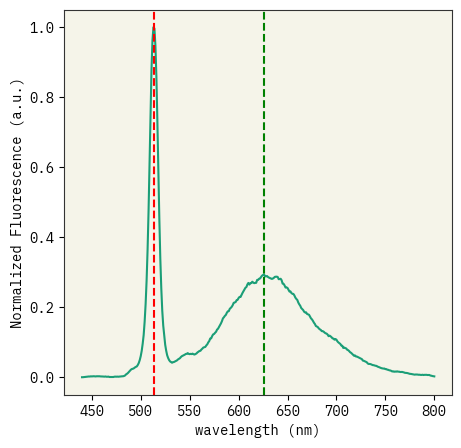

In [37]:
#read data from processed_wobaselinev4.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
df = pd.read_csv('Data/processed_datawobaselinev4.csv')
#group by experiment
grouped = list(df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']))
#plot the wavelength vs normalized fluorescence intensity for each experiment
for name, group, in grouped:

    wl = ast.literal_eval(group['Fl_Wavelengths'][0])
    fl = ast.literal_eval(group['Fluorescence_norm'][0])
    #increase the size
    plt.figure(figsize=(5,5))
    plt.plot(wl, fl, label=name)
    plt.xlabel('wavelength (nm)')
    plt.ylabel('Normalized Fluorescence (a.u.)')
    #make the Peak1,Peak2 be vertical lines in the plot
    plt.axvline(x=513.1, color='r', linestyle='--', label='Peak1')
    plt.axvline(x=626, color='g', linestyle='--', label='Peak2')
    plt.show()
    break
    #for exp, temp,doping,temp in name:
    #    plt.plot(group['Fl_Wavelengths'], group['Fluorescence_norm'], label=name)
#    plt.plot(group['Fl_Wavelengths'], group['Fluorescence_norm'], label=name)
